## 6.20 
模拟 $n$=48，$\phi$ =0.7 的 AR(1) 时间序列。

In [5]:
set.seed(123)  # 设置随机种子，保证结果可重复

n <- 48
phi <- 0.7

x <- arima.sim(model = list(ar = phi), n = n)  # 生成 AR(1) 时间序列

### (a) 
计算该模型在 1 阶和 5 阶滞后处的理论自相关系数。  

$\text{Solution}.$  

In [6]:
rho1 = 0.7
rho5 = 0.7^5

In [7]:
rho1

[1] 0.7

In [8]:
rho5

[1] 0.16807

对于 AR(1) 模型，其自相关函数为：
$$
\rho_k = \phi^k
$$
因此，1 阶滞后处的理论自相关系数为：
$$
\rho_1 = \phi^1 = 0.7
$$
5 阶滞后处的理论自相关系数为：
$$
\rho_5 = \phi^5 = 0.7^5 \approx 0.16807
$$

### (b) 
计算 1 阶和 5 阶滞后处样本自相关系数，并将其与理论自相关值进行比较。用方程（6.1.5）和（6.1.6）量化这个比较。  

$\text{Solution}.$  


In [9]:
acf_values <- acf(x, plot = FALSE)  # 计算自相关系数
acf_values


Autocorrelations of series 'x', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.716  0.529  0.371  0.204  0.119 -0.027 -0.117 -0.221 -0.254 -0.287 
    11     12     13     14     15     16 
-0.276 -0.285 -0.282 -0.111 -0.066  0.024 

In [10]:
r1 <- acf_values$acf[2]  # 1 阶滞后处的样本自相关系数
r5 <- acf_values$acf[6]  # 5 阶滞后处的样本自相关系数

In [11]:
r1

[1] 0.7161295

In [12]:
r1 - rho1

[1] 0.01612949

In [13]:
r5

[1] 0.1186186

In [14]:
r5 - rho5

[1] -0.04945138

由此可见，样本自相关系数$r_1 , r_5$与理论自相关系数$\rho_1 , \rho_5$之间**差异比较小**。

$$Var(r_1) \approx \frac{1-\phi^2}{n} \quad  \text{(6.1.5)} $$  

$$Var(r_k) \approx \frac{1}{n}[\frac{1+\phi^2}{1-\phi^2}] \space , \quad \text{对较大的} k \quad  \text{(6.1.6)} $$

In [15]:
Var_r1 = (1 - phi^2) / n
Var_r1

[1] 0.010625

In [16]:
Var_r5 = 1 / n * ((1 + phi^2) / (1 - phi^2))
Var_r5

[1] 0.06086601

样本自相关系数与真实理论自相关系数值的差异与估计量的方差有关。方差越小，估计的精度越高。  

方差 $Var(r_1)$ 和 $Var(r_5)$ 都非常小，所以样本自相关系数的估计精度还是比较高的。

### (c) 
使用新的模拟重复（b）。描述在相同条件下，估计的精度如何随所选样本的不同而变化。  

$\text{Solution}.$

In [17]:
set.seed(789)  # 设置随机种子，保证结果可重复
x <- arima.sim(model = list(ar = phi), n = n)  # 生成 AR(1) 时间序列

In [18]:
acf_values <- acf(x, plot = FALSE)  # 计算自相关系数

r1 <- acf_values$acf[2]  # 1 阶滞后处的样本自相关系数
r5 <- acf_values$acf[6]  # 5 阶滞后处的样本自相关系数

In [19]:
r1 - rho1

[1] 0.01311753

In [20]:
r5 - rho5

[1] -0.03310164

In [21]:
Var_r1 = (1 - phi^2) / n
Var_r1

[1] 0.010625

In [22]:
Var_r5 = 1 / n * ((1 + phi^2) / (1 - phi^2))
Var_r5

[1] 0.06086601

**不同的样本**会导致**样本自相关系数有所不同**，但总体上方差大致相同，因此$r$作为$\rho$的估计量应当在特定的理论值周围波动。

### (d) 
如果软件允许，重复模拟序列并多次计算 $r_1$ 和 $r_5$，并且构建 $r_1$ 和 $r_5$ 的样本分布。  

描述估计的精度如何随着相同条件下所选择的样本的不同而变化。  

方程（6.1.5）给出的大样本方差与你的样本分布的方差接近程度如何？  

$\text{Solution}.$

In [ ]:
# 设置重复次数
num_simulations <- 10000

# 存储每次模拟的 r1 和 r5
r1_distribution <- numeric(num_simulations)
r5_distribution <- numeric(num_simulations)

for (i in 1:num_simulations) {
  # 模拟 AR(1) 序列
  set.seed(i+10)  # 设置随机种子，保证结果可重复
  x_sim = arima.sim(model = list(ar = phi), n = n)
  
  # 计算样本自相关系数
  acf_sim <- acf(x_sim, plot = FALSE)
  r1_distribution[i] <- acf_sim$acf[2]
  r5_distribution[i] <- acf_sim$acf[6]
}

# 计算样本分布的均值
mean_r1 <- mean(r1_distribution)
mean_r5 <- mean(r5_distribution)

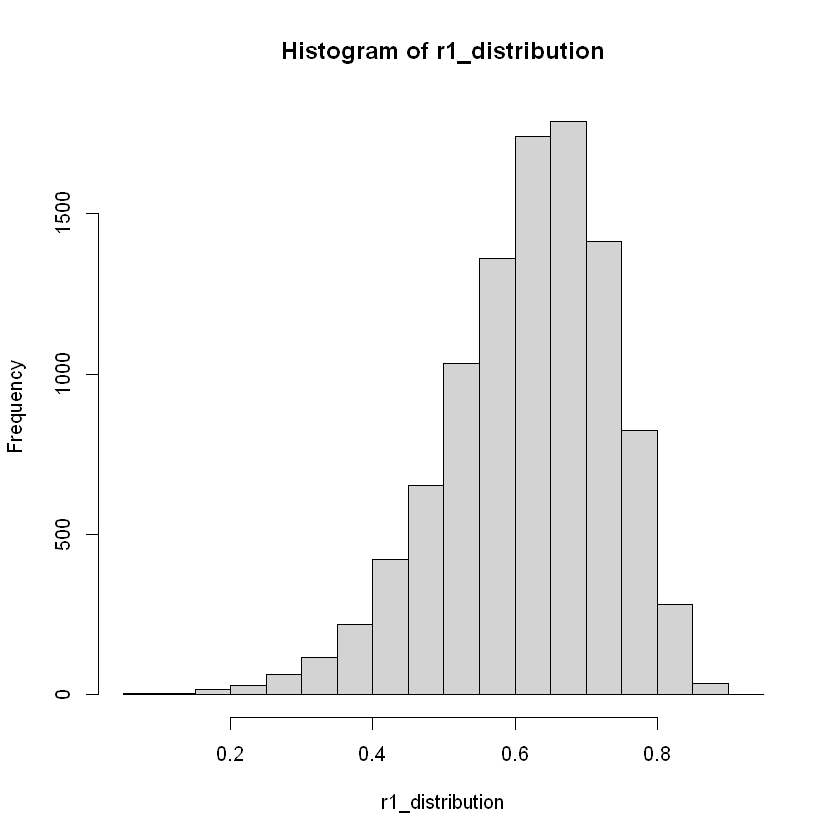

In [73]:
hist(r1_distribution)

In [74]:
summary(r1_distribution)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.05942 0.54793 0.63094 0.61815 0.70134 0.90860 

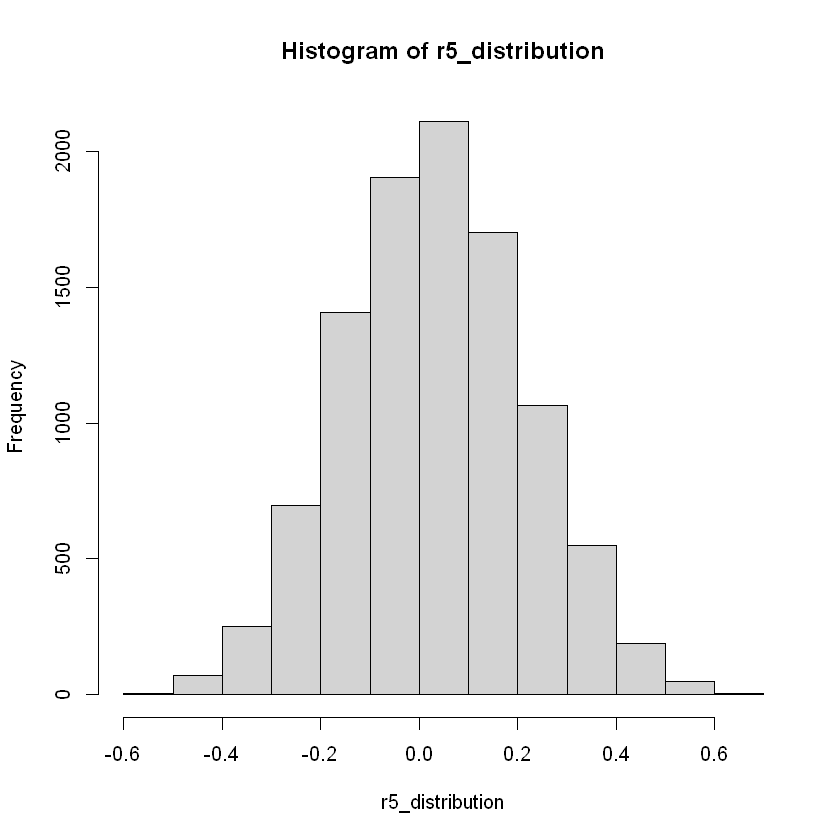

In [75]:
hist(r5_distribution)

In [76]:
summary(r5_distribution)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.55854 -0.09543  0.03152  0.03336  0.15937  0.62919 

分布情况展示如上。  

$r_1$的理论值$\rho_1 = 0.7$大致在3/4分位数附近，$r_5$的理论值$\rho_5 = 0.16807$已经超过3/4分位数。  

由此可见，参数估计的精度随着样本的不同而变化。但是估计值的方差与方程（6.1.5）给出的方差很接近，具体如下：

In [61]:
variance_r1_sample = var(r1_distribution)
variance_r1

[1] 0.01372518

In [62]:
variance_r5_sample = var(r5_distribution)
variance_r5

[1] 0.03183085

In [63]:
variance_r1_sample - Var_r1

[1] 0.002942697

In [64]:
variance_r5_sample - Var_r5

[1] -0.02680021

在大样本的渐进性质下，方差的估计是愈发趋向准确的。

## 6.21 
模拟 $n$=60，$\theta$=0.5 的 MA(1) 时间序列。

In [23]:
n = 60
theta = 0.5

set.seed(61)
x <- arima.sim(model = list(ma = -theta), n = n)  # 生成 MA(1) 时间序列

### (a) 
计算该模型 1 阶滞后处的理论自相关系数。

$\text{Solution}.$

In [24]:
-theta/(1+theta^2)

[1] -0.4

理论自相关系数为-0.4

### (b) 
计算 1 阶滞后处样本自相关系数，并将其与理论自相关系数进行比较。用图表 6-2 量化这个比较。  

$\text{Solution}.$

In [25]:
acf_values <- acf(x, plot = FALSE)  # 计算自相关系数
r1 = acf_values['1']

In [26]:
r1


Autocorrelations of series 'x', by lag

     1 
-0.412 

从中我们得到，样本自相关系数$r_1 = -0.412$与理论自相关系数$\rho_1 = -0.4$接近。

In [22]:
0.79 / n^0.5

[1] 0.1019886

根据表（6.2），$\sqrt{Var(r_1)}=\frac{0.79}{\sqrt{n}} \approx 0.10199$  

发现估计值与真实值之间的差异也就是一个大样本标准差。估计的准确度是较高的。

### (c) 
使用新的模拟重复（b）。描述在相同条件下，估计的精度如何随所选样本的不同而变化。

$\text{Solution}.$

In [29]:
set.seed(996)
x <- arima.sim(model = list(ma = -theta), n = n)  # 生成 MA(1) 时间序列

acf_values <- acf(x, plot = FALSE)  # 计算自相关系数
r1 = acf_values['1']
r1


Autocorrelations of series 'x', by lag

     1 
-0.295 

这次的估计偏误明显会大一点。不同的样本会导致**样本自相关系数有所不同**，但总体上方差大致相同，因此$r$作为$\rho$的估计量应当在特定的理论值周围波动。

### (d) 
如果软件允许，重复模拟序列并多次计算 r₁，并且构建 r₁ 的样本分布。描述估计的精度如何随着相同条件下所选择样本的不同而变化。图表 6-2 给出的大样本方差与你的样本分布的方差接近程度如何？

$\text{Solution}.$

In [37]:
# 设置重复次数
num_simulations <- 10000

# 存储每次模拟的 r1
r1_distribution <- numeric(num_simulations)

for (i in 1:num_simulations) {
  # 模拟 AR(1) 序列
  set.seed(i+10077)  # 设置随机种子，保证结果可重复
  x_sim = arima.sim(model = list(ma = -theta), n = n)
  
  # 计算样本自相关系数
  acf_sim <- acf(x_sim, plot = FALSE)
  r1_distribution[i] <- acf_sim$acf[2]
}

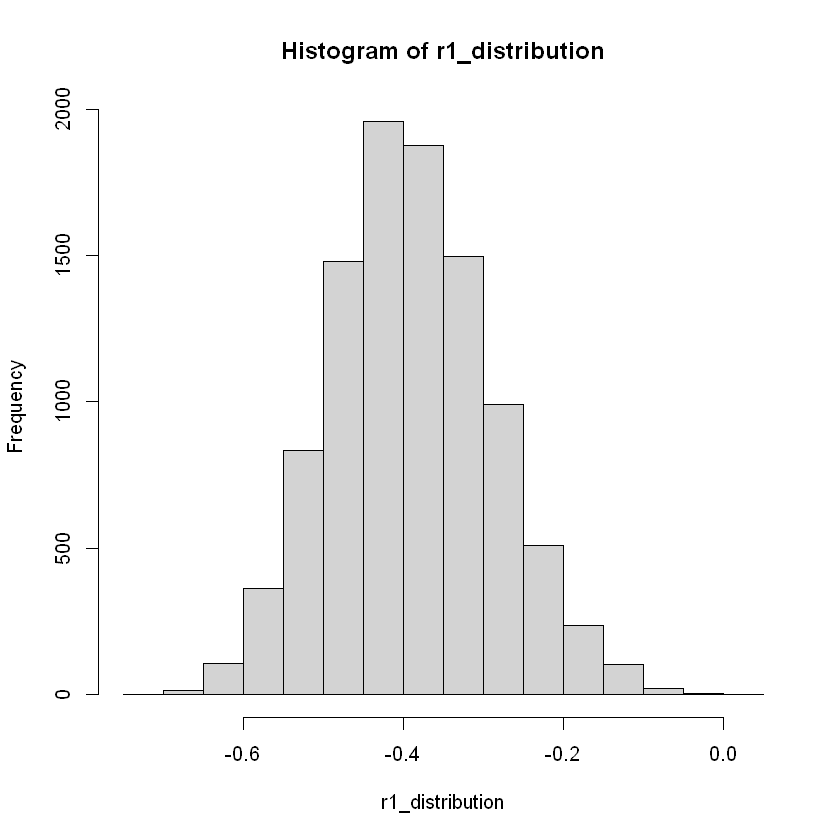

In [38]:
hist(r1_distribution)

In [39]:
summary(r1_distribution)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.73653 -0.45925 -0.39374 -0.38948 -0.32294  0.01198 

In [40]:
mean(r1_distribution)

[1] -0.389483

由此可见，大样本下估计值$r_1$是比较接近理论值$\rho_1$的。  

在此次模拟中，1/4分位数和3/4分位数分别位于-0.45和-0.32附近，说明估计值在理论值-0.4附近波动，大部分估计的精度是比较高的。从分布直方图来看，分布并不厚为，偏误较大的估计值是很少的。

In [42]:
var(r1_distribution)**0.5

[1] 0.1002948

样本方差开根$\sqrt{Var(r_1)} \approx = 0.10029$，与表（6.2）给出的$0.10199$相当接近。